# FY3C VIRR 海冰密集度

In [1]:
from RSData import *
from HaiYangData import *
import glob
import cmaps

In [2]:

files = glob.glob(r'H:\icecon\VIRR\FY-3C VIRR\2016.7-12\*.HDF')
# hyfiles = hyfiles[0:28]


In [3]:
fy_virr = HaiYangData(satellite='FY3C', sensor='VIRR',resolution=25000)


# 将WGS 84坐标（4326）转化为极射投影
crs = CRS.from_epsg(4326)
crs = CRS.from_string("epsg:4326")
crs = CRS.from_proj4("+proj=latlon")
crs = CRS.from_user_input(4326)
crs2 = CRS(proj="aeqd")

transformer = HaiYangData.set_transformer(crs,crs2)
transformer_back = HaiYangData.set_transformer(crs2,crs)

In [18]:
files[72]

'H:\\icecon\\VIRR\\FY-3C VIRR\\2016.7-12\\FY3C_VIRRX_GBAL_L2_SIC_MLT_GLL_20160910_POAD_1000M_MS.HDF'

In [4]:
grid_array = np.zeros((fy_virr.nlat,fy_virr.nlon))
grid_num_array = np.zeros((fy_virr.nlat,fy_virr.nlon))

In [19]:
# for file in files:
with Dataset(files[72], mode='r') as fh:
    sic = fh.variables['Daily Sea Ice Coverage Grid'][:]

In [20]:
lats, lons = np.mgrid[ 90:-90:1800j,-180:180:3600j]

In [21]:
projlats, projlons = transformer.transform(lats, lons)

value_array = np.empty(shape=(lons.shape[0], lons.shape[1],5))

value_array[:,:,0] = lats
value_array[:,:,1] = lons
value_array[:,:,2],value_array[:,:,3] = transformer.transform(value_array[:,:,0], value_array[:,:,1])
value_array[:,:,4] = sic

x = (value_array[:,:,2] / fy_virr.resolution).astype(np.int)
y = (value_array[:,:,3] / fy_virr.resolution).astype(np.int)


In [22]:

grid_array[y,x] += value_array[:,:,4]
grid_num_array[y,x] += 1
# 获得XYmgrid

grid_array = grid_array / grid_num_array

In [23]:
# num_grid = HaiYangData.get_zeros_grid(self.nlat, self.nlon)
# grid_array = HaiYangData.get_nan_grid(self.nlat, self.nlon,5)
x_map, y_map = fy_virr.get_map_grid(transformer_back)


In [24]:
# 将非法点置为np.nan
grid_array[grid_array==0] = np.nan


In [17]:
_x = np.arange(fy_virr.nlat)
_y = np.arange(fy_virr.nlon)
_xx, _yy = np.meshgrid(_x * fy_virr.resolution, _y * fy_virr.resolution)

In [19]:
_y_map, _x_map = transformer_back.transform(_xx, _yy)

<ipython-input-25-9b76f165dcef>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hy_m.pcolormesh(x_map, y_map, data=grid_array, cmap=plt.cm.jet,vmin=0,latlon = True)


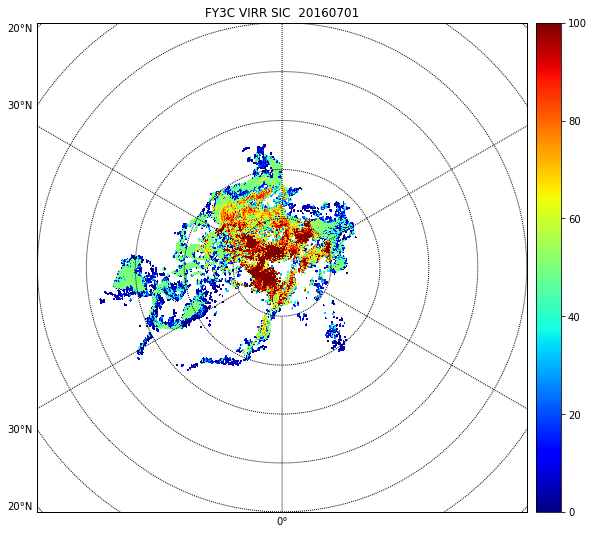

In [25]:
plt.figure(figsize=(16, 9))
hy_m = Basemap(projection='npaeqd', boundinglat=40, lon_0=0, resolution='c')
hy_m.pcolormesh(x_map, y_map, data=grid_array, cmap=plt.cm.jet,vmin=0,latlon = True)
hy_m.colorbar(location='right')
# hy_m.fillcontinents()
hy_m.drawmapboundary()
hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
plt.title("FY3C VIRR SIC  20160701")
plt.show()
plt.close()

<ipython-input-26-f347df5e1ba6>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hy_m.pcolormesh(x_map, y_map, data=grid_array, cmap=plt.cm.jet,vmin=0,latlon = True)


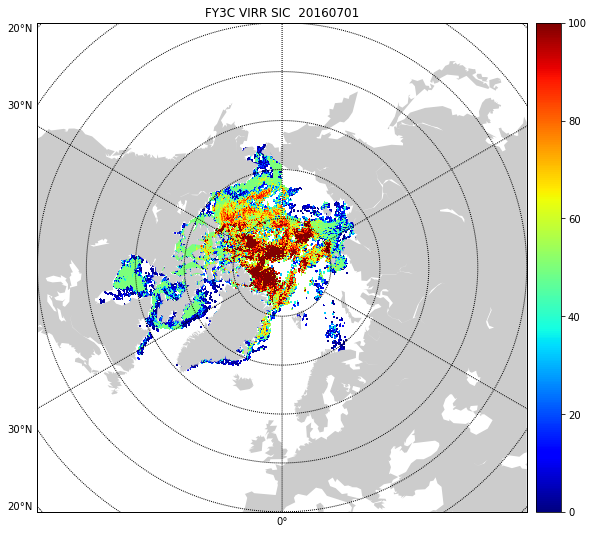

In [26]:
plt.figure(figsize=(16, 9))
hy_m = Basemap(projection='npaeqd', boundinglat=40, lon_0=0, resolution='c')
hy_m.pcolormesh(x_map, y_map, data=grid_array, cmap=plt.cm.jet,vmin=0,latlon = True)
hy_m.colorbar(location='right')
hy_m.fillcontinents()
hy_m.drawmapboundary()
hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
plt.title("FY3C VIRR SIC  20160701")
plt.show()
plt.close()